### 0. Loading libraries

In [39]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### 0.1 Loading the data

In [40]:
(x_train_data, y_train_labels), (x_test_data, y_test_labels) = mnist.load_data()

#### Check what inside of the dataset

Printing out shapes for entire train set, first element in the set, label for that picture. Also, I'm printing matrix itself for the first element to see what data we have, and I clearly see the 5 in the matrix; it doesn't look nice enough because of the length of array is too much for one line to be shown on one line, so it spreads between two lines, but 5 is still recognizable pretty easily. I used array slicing to extract only middle part of the matrix to be able to fit 5 on the screen. I'm not really sure about why it worked the way I did, because I was trying to cut rows and then colums like so [4:26][10:24], but it didn't work and just cut additonal lines when I'm assuming second square bracket statment has to be colums, but by googling I found to access colums I have to use comma, but I don't undestand the way it exactly works. Also, printing grayscale picture of the number.

(60000, 28, 28)
(28, 28)
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219

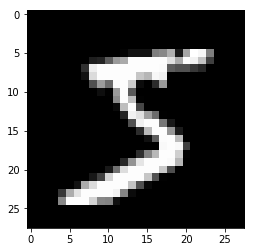

In [41]:
print(x_train_data.shape)
print(x_train_data[0].shape)
print(y_train_labels[0])
print(x_train_data[0])
print(x_train_data[0][4:26:,10:24])
plt.imshow(x_train_data[0], cmap = cm.gray)

### 1. Preparing the mnist data

#### Reshape

Reshaping 28x28 px pictures matrices to one dimentional array, because our model needs to get all data at once, so we reshaping it to make 784x1 to be able to feed it to our model to be able to train. 

Using hot vectorization on labels for data that will give us 1 at correct number place. Model will have to need output, since we categorize number from (0-9) our output will be a vetrol length 10 in order to match our labels we use hot vectorization.

In [42]:
x_train_data = x_train_data.reshape(60000, 28*28)

y_train_labels = to_categorical(y_train_labels)

Check that our reshaping step worked

In [43]:
print(x_train_data.shape)
print(y_train_labels.shape)

(60000, 784)
(60000, 10)


#### Split the data for cross validation

Using sklearn library to evenly split the data between training and validation batches; it selects data points in the way they are will be evenly spreaded to be similar without a possibility to loose shavel entire category to one of the subsets.

In [44]:
x_train_part, x_train_val, y_train_part, y_train_val = train_test_split(x_train_data, y_train_labels, 
                                                                        test_size=0.2, 
                                                                        random_state=42, 
                                                                        stratify=
                                                                        np.argmax(y_train_labels, axis=1))
epoch = 100

---
### 2. One hidden layer neural networks

### 2.1 One hidden layer with 100 nodes

#### Assembling the model
Creating sequential model with 1 hidden layer of 100 nodes and final output layer of 10 nodes that will be matching our hot-vectors of the lables.

We use input shape only once at the first layer because it needs to know what it gets when other layers will be able to figure it out based on a previous layer. 

Activation relu is a simple linear function that zeros-out all negative weights to have all positive weight to have intentional affect on a model. Relu is usually used on hidden layers.

Activation softmax gives likehood probabilities of each output category. The maximum probability among categories is what a model choose. 

In [45]:
model_1 = models.Sequential()

model_1.add(layers.Dense(100, activation='relu', input_shape=(28*28,)))
model_1.add(layers.Dense(10, activation='softmax'))

#### Compiling the model
Rmsprop optimizer similar to rprop taking two gradients of the last two weights but increasing them in magnitude to converge faster. 

We use categorical crossentropy because we have multiple categories to choose from.

In [46]:
model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

#### Train the model
I used different batches and epochs. I decided to use 100 epochs for all models, but depending on model hidden layers, I was tweaking batch size to get the best result. I run into a problem of having my model to completely miss several numbers; At times, it doesn't recognize some numbers completely, but seems it happens by random and no colleration with a batch size or epochs. I found 1024 batch size for 100 hidden nodes works better than smaller size for some reasons even though articles say opposite. 

Model returns a history object that I save.

In [47]:
history_1 = model_1.fit(x_train_part, 
                        y_train_part, 
                        epochs = epoch, 
                        batch_size = 1024,
                        validation_data=(x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 13us/step - loss: 9.3304 - acc: 0.4167 - val_loss: 8.5778 - val_acc: 0.4656
Epoch 2/100
48000/48000 [==============================] - 0s 10us/step - loss: 7.4392 - acc: 0.5344 - val_loss: 5.6846 - val_acc: 0.6425
Epoch 3/100
48000/48000 [==============================] - 0s 10us/step - loss: 5.5653 - acc: 0.6506 - val_loss: 5.4436 - val_acc: 0.6587
Epoch 4/100
48000/48000 [==============================] - 0s 10us/step - loss: 4.3796 - acc: 0.7215 - val_loss: 3.0279 - val_acc: 0.8041
Epoch 5/100
48000/48000 [==============================] - 0s 9us/step - loss: 2.8823 - acc: 0.8149 - val_loss: 2.7381 - val_acc: 0.8241
Epoch 6/100
48000/48000 [==============================] - 1s 11us/step - loss: 2.6570 - acc: 0.8294 - val_loss: 2.9346 - val_acc: 0.8113
Epoch 7/100
48000/48000 [==============================] - 0s 9us/step - loss: 2.5391 - acc: 0.8375 - val_loss: 2.5792 - va

Epoch 60/100
48000/48000 [==============================] - 1s 10us/step - loss: 0.2579 - acc: 0.9830 - val_loss: 0.5025 - val_acc: 0.9669
Epoch 61/100
48000/48000 [==============================] - 0s 10us/step - loss: 0.2503 - acc: 0.9832 - val_loss: 0.5143 - val_acc: 0.9657
Epoch 62/100
48000/48000 [==============================] - 0s 10us/step - loss: 0.2446 - acc: 0.9835 - val_loss: 0.4465 - val_acc: 0.9705
Epoch 63/100
48000/48000 [==============================] - 1s 11us/step - loss: 0.2409 - acc: 0.9837 - val_loss: 0.4777 - val_acc: 0.9687
Epoch 64/100
48000/48000 [==============================] - 0s 10us/step - loss: 0.2266 - acc: 0.9848 - val_loss: 0.4726 - val_acc: 0.9682
Epoch 65/100
48000/48000 [==============================] - 0s 10us/step - loss: 0.2271 - acc: 0.9845 - val_loss: 0.4659 - val_acc: 0.9686
Epoch 66/100
48000/48000 [==============================] - 0s 10us/step - loss: 0.2311 - acc: 0.9842 - val_loss: 0.4872 - val_acc: 0.9675
Epoch 67/100
48000/48000 [=

Getting needed statistics from history dictionary

In [48]:
history_dict_1 = history_1.history
loss_1 = history_dict_1['loss']
val_loss_1 = history_dict_1['val_loss']
acc_1 = history_dict_1['acc']
val_acc_1 = history_dict_1['val_acc']

epochs_1 = range(1, len(acc_1)+1)

### 2.1.1 Plot the history data for comparison.

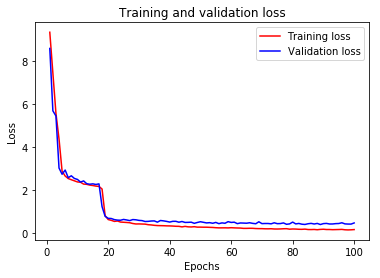

In [49]:
plt.plot(epochs_1, loss_1, 'r', label='Training loss')
plt.plot(epochs_1, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We see on the graph that Training loss and Validation loss go to zero and naturally training loss a bit smaller since model was trained on it.
___

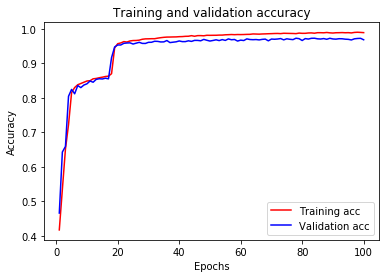

In [50]:
plt.plot(epochs_1, acc_1, 'r', label='Training acc')
plt.plot(epochs_1, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Same here we see training accuracy is better than vaidation one.
___

### 2.1.2 Confusion matrix and classification report

To crate confusion matrix we feed our test data to our model using predict function. We get predicted labels from the model and using confusion matrix to compare actual labels to generated lables by the model.

Classification report generates sucessful precentage for each class and shows aveage accuracy.

In [100]:
y_pred_1 = model_1.predict(x_test_data.reshape(10000, 28*28))
y_pred_test_1 = np.argmax(y_pred_1, axis=1)

In [101]:
print(confusion_matrix(y_test_labels, y_pred_test_1))
print(classification_report(y_test_labels, y_pred_test_1))

[[ 969    1    0    2    0    0    2    0    3    3]
 [   0 1128    4    1    0    0    1    0    1    0]
 [   5    5  998    8    2    0    2    4    8    0]
 [   1    2    6  988    0    1    0    4    6    2]
 [   3    7    3    0  931    0    7    0    4   27]
 [   2    0    0   14    0  844   14    4    9    5]
 [   4    4    0    1    3    2  939    0    5    0]
 [   1   21   12    2    1    0    0  976    2   13]
 [   7    1    3    4    3    0    2    3  948    3]
 [   2   11    1    7    4    0    2    4    9  969]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      0.99      0.97      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.95      0.97       982
           5       1.00      0.95      0.97       892
           6       0.97      0.98      0.97       958
           7       0.98      0.95   

Confusion matrix shows that the model did well of predicting the numbers. Some sevens and fours confused with nine, and some sevens confused with one also.

Accuracy is pretty good on the test data. The least accuracy is 9 because some numbers were confused to this category, but overall accuracy is still good.

### 2.2 One hidden layer with 400 nodes

#### Assembling the model
Creating sequential model with 1 hidden layer of 400 nodes and final output layer of 10 nodes that will be matching our hot-vectors of the lables.

We use input shape only once at the first layer because it needs to know what it gets when other layers will be able to figure it out based on a previous layer. 

Activation relu is a simple linear function that zeros-out all negative weights to have all positive weight to have intentional affect on a model. Relu is usually used on hidden layers.

Activation softmax gives likehood probabilities of each output category. The maximum probability among categories is what a model choose. 

In [53]:
model_4 = models.Sequential()
model_4.add(layers.Dense(400, activation='relu',input_shape=(28*28,)))
model_4.add(layers.Dense(10, activation='softmax'))

#### Compiling the model
Rmsprop optimizer similar to rprop taking two gradients of the last two weights but increasing them in magnitude to converge faster. 

We use categorical crossentropy because we have multiple categories to choose from.

In [54]:
model_4.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['acc'])

#### Train the model
This model with 400 nodes performs worse that 100 nodes in general. When 100 nodes most of the time classifies all the numbers. 400 nodes doesn't classify at least one number completely every time I run it. I tried to reduce a batch size to improve accuracy. It did help, but overall accuracy is still on the low side. Minimum batch I've tried was 32. Also, I did 512 batch size with 500 epochs that trained the model well but takes up unresonable amount of time.

Model returns a history object that I save.

In [95]:
history_4 = model_4.fit(x_train_part, 
                        y_train_part, 
                        epochs = epoch, 
                        batch_size = 100, 
                        validation_data = (x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 62us/step - loss: 1.8621 - acc: 0.8843 - val_loss: 1.9941 - val_acc: 0.8761
Epoch 2/100
48000/48000 [==============================] - 3s 61us/step - loss: 1.8679 - acc: 0.8839 - val_loss: 1.9830 - val_acc: 0.8766
Epoch 3/100
48000/48000 [==============================] - 3s 61us/step - loss: 1.8492 - acc: 0.8850 - val_loss: 1.9776 - val_acc: 0.8769
Epoch 4/100
48000/48000 [==============================] - 3s 62us/step - loss: 1.8725 - acc: 0.8835 - val_loss: 2.0208 - val_acc: 0.8741
Epoch 5/100
48000/48000 [==============================] - 3s 63us/step - loss: 1.8873 - acc: 0.8827 - val_loss: 2.0349 - val_acc: 0.8734
Epoch 6/100
48000/48000 [==============================] - 3s 70us/step - loss: 1.8693 - acc: 0.8838 - val_loss: 2.0399 - val_acc: 0.8729
Epoch 7/100
48000/48000 [==============================] - 4s 77us/step - loss: 1.8605 - acc: 0.8842 - val_loss: 2.0020 - 

Getting needed statistics from history dictionary to plot graphs.

In [96]:
history_dict_4 = history_4.history
loss_4 = history_dict_4['loss']
val_loss_4 = history_dict_4['val_loss']
acc_4 = history_dict_4['acc']
val_acc_4 = history_dict_4['val_acc']

## 2.2.1 Plot the history data for comparison.

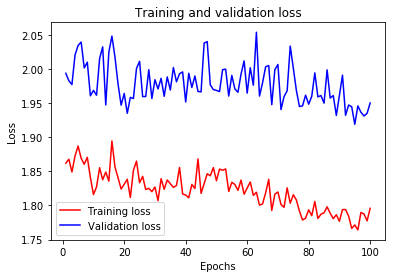

In [97]:
epochs_4 = range(1, len(acc_4)+1)
plt.plot(epochs_4, loss_4, 'r', label='Training loss')
plt.plot(epochs_4, val_loss_4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

There is a difference between this and the previous network. The loss is not significantly changing over 100 epochs. Also, the model performs much to be desired on the validaiton data.  
___

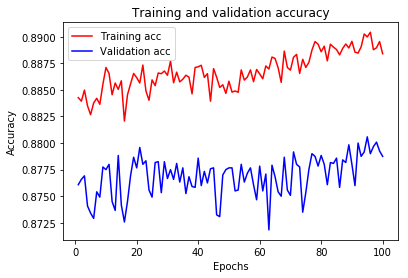

In [98]:
plt.plot(epochs_4, acc_4, 'r', label='Training acc')
plt.plot(epochs_4, val_acc_4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy is also not really great initially with larger batch it was about 0.6 by significatnly decreasing batch size I got better results over 100 epochs. Overall, this model didn't performed well.
___

In [99]:
y_pred_4 = model_4.predict(x_test_data.reshape(10000, 28*28))
y_pred_test_4 = np.argmax(y_pred_4, axis=1)

In [94]:
print(confusion_matrix(y_test_labels, y_pred_test_4))
print(classification_report(y_test_labels, y_pred_test_4))

[[ 967    0    3    0    0    1    5    1    3    0]
 [   0 1117    2    3    0    0    4    0    9    0]
 [   6    1 1007    2    2    0    2    5    7    0]
 [   0    0    6  992    0    1    0    5    6    0]
 [   1    0    3    0  962    0    8    2    6    0]
 [   3    0    0   16    1  847   10    0   15    0]
 [   5    2    0    0    1    3  941    1    5    0]
 [   1    5   14    5    2    0    0  996    5    0]
 [   0    1    3    7    1    1    6    3  952    0]
 [   7    7    2   49  594   32    2  235   81    0]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.92      0.98      0.95      1010
           4       0.62      0.98      0.76       982
           5       0.96      0.95      0.95       892
           6       0.96      0.98      0.97       958
           7       0.80      0.97   

Confusion matrix shows that number 9 wasn't recognized at all by the model. Nine was missclassified as mostly as 4 and 7.

Because of number 9 wasn't classified completely it significantly decreased overall accuracy. Also, it affected accuracy where 9 was missclassified to — 4 and 7.

### 3.1 Two hidden layers neural networks

#### Assembling the model
Creating model with two identical hidden layers with the same parameters as before. Compiling and train the model the same way as well. I just kept larger batch to save time on training. I tried different batches; 1024 size performed a bit better that I'd tried before. I had as small as 512 batch size.

In [61]:
model_2_2 = models.Sequential()
model_2_2.add(layers.Dense(200, activation='relu', input_shape = (28*28,)))
model_2_2.add(layers.Dense(200, activation='relu'))
model_2_2.add(layers.Dense(10, activation='softmax'))

#### Compiling the model

In [62]:
model_2_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

#### Tran the model

In [77]:
history_2_2 = model_2_2.fit(x_train_data, 
                            y_train_labels, 
                            epochs = epoch, 
                            batch_size = 1024, 
                            validation_data = (x_train_val, y_train_val))

Train on 60000 samples, validate on 12000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 16us/step - loss: 5.1876 - acc: 0.6780 - val_loss: 5.1553 - val_acc: 0.6800
Epoch 2/100
60000/60000 [==============================] - 1s 15us/step - loss: 5.1648 - acc: 0.6793 - val_loss: 5.1739 - val_acc: 0.6787
Epoch 3/100
60000/60000 [==============================] - 1s 15us/step - loss: 5.1735 - acc: 0.6788 - val_loss: 5.1483 - val_acc: 0.6803
Epoch 4/100
60000/60000 [==============================] - 1s 15us/step - loss: 5.1435 - acc: 0.6807 - val_loss: 5.1545 - val_acc: 0.6801
Epoch 5/100
60000/60000 [==============================] - 1s 15us/step - loss: 5.1248 - acc: 0.6818 - val_loss: 5.1301 - val_acc: 0.6817
Epoch 6/100
60000/60000 [==============================] - 1s 16us/step - loss: 5.1517 - acc: 0.6802 - val_loss: 5.1788 - val_acc: 0.6785
Epoch 7/100
60000/60000 [==============================] - 1s 16us/step - loss: 5.1722 - acc: 0.6788 - val_loss: 5.1441 - 

In [83]:
history_dict_2_2 = history_2_2.history
loss_2_2 = history_dict_2_2['loss']
val_loss_2_2 = history_dict_2_2['val_loss']
acc_2_2 = history_dict_2_2['acc']
val_acc_2_2 = history_dict_2_2['val_acc']

epochs_2_2 = range(1, len(acc_2_2)+1)

### 3.1.1 Plot the history data for comparison.

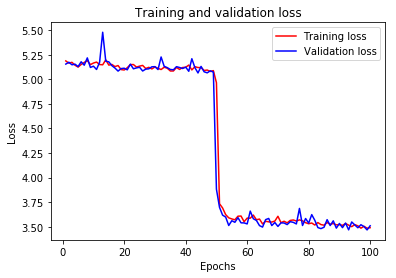

In [84]:
plt.plot(epochs_2_2, loss_2_2, 'r', label='Training loss')
plt.plot(epochs_2_2, val_loss_2_2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Accordingly to the graph the loss is not that grate compare to the first one layer network wtih 100 nodes. 
___

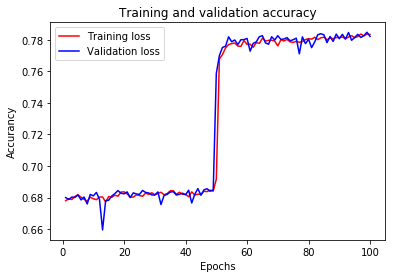

In [102]:
plt.plot(epochs_2_2, acc_2_2, 'r', label='Training loss')
plt.plot(epochs_2_2, val_acc_2_2, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accurancy')
plt.legend()
plt.show()

Accuracy is far behind compare to the first two single layer networks.
___

In [86]:
y_pred_2_2 = model_2_2.predict(x_test_data.reshape(10000, 28*28))
y_pred_test_2_2 = np.argmax(y_pred_2_2, axis=1)

In [87]:
print(confusion_matrix(y_test_labels, y_pred_test_2_2))
print(classification_report(y_test_labels, y_pred_test_2_2))

[[ 970    1    3    0    0    1    4    0    1    0]
 [   0 1124    3    1    0    2    4    0    1    0]
 [   4    3 1005    8    0    1    7    0    4    0]
 [   0    0    1  998    0    7    0    0    4    0]
 [   2    0    1    1  964    0   13    0    1    0]
 [   6    0    0   12    0  859   14    0    1    0]
 [   7    1    0    0    1    2  947    0    0    0]
 [ 126   53  116  575  104   33    0    0   21    0]
 [  10    1    2   22    6   12    9    0  912    0]
 [  24   13    2  114  782   45    4    0   25    0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       980
           1       0.94      0.99      0.96      1135
           2       0.89      0.97      0.93      1032
           3       0.58      0.99      0.73      1010
           4       0.52      0.98      0.68       982
           5       0.89      0.96      0.93       892
           6       0.95      0.99      0.97       958
           7       0.00      0.00   

Confusion matrix shows that current model didn't classify 2 numbers at all. 7 mostly was confused with 3, and 9 almost all was confused with 4.

Accuracy is low on 4 and 3 because nonclassified numbers affected accuracy of 4 and 3.

### 3.2 Two hidden layers with 200 and 100 nodes 

#### Assembling the model
Creating model with two hidden layers one is 200 and second one is 100 with the same parameters as before. Compiling and train the model the same way as well. I tried a smaller batch size to have a better accuracy.

In [69]:
model_2_1 = models.Sequential()
model_2_1.add(layers.Dense(200, activation='relu', input_shape=(28*28,)))
model_2_1.add(layers.Dense(100, activation='relu'))
model_2_1.add(layers.Dense(10, activation='softmax'))

#### Compiling the model

In [70]:
model_2_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

#### Training the model

In [71]:
history_2_1 = model_2_1.fit(x_train_data, 
                            y_train_labels, 
                            epochs = epoch, 
                            batch_size = 512, 
                            validation_data = (x_train_val, y_train_val))

Train on 60000 samples, validate on 12000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 22us/step - loss: 4.0177 - acc: 0.7388 - val_loss: 1.8467 - val_acc: 0.8748
Epoch 2/100
60000/60000 [==============================] - 1s 18us/step - loss: 1.4346 - acc: 0.9029 - val_loss: 1.1852 - val_acc: 0.9179
Epoch 3/100
60000/60000 [==============================] - 1s 18us/step - loss: 1.0813 - acc: 0.9270 - val_loss: 1.5493 - val_acc: 0.8965
Epoch 4/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.9815 - acc: 0.9339 - val_loss: 0.9741 - val_acc: 0.9343
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.8792 - acc: 0.9411 - val_loss: 1.0646 - val_acc: 0.9289
Epoch 6/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.8071 - acc: 0.9458 - val_loss: 0.7269 - val_acc: 0.9512
Epoch 7/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.7504 - acc: 0.9496 - val_loss: 0.6705 - 

In [78]:
history_dict_2_1 = history_2_1.history
loss_2_1 = history_dict_2_1['loss']
val_loss_2_1 = history_dict_2_1['val_loss']
acc_2_1 = history_dict_2_1['acc']
val_acc_2_1 = history_dict_2_1['val_acc']

epochs_2_1 = range(1, len(acc_2_1)+1)

### 3.2.1 Plot the history data for comparison.

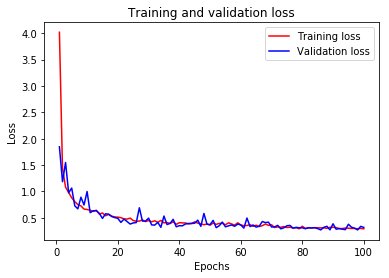

In [79]:
plt.plot(epochs_2_1, loss_2_1, 'r', label='Training loss')
plt.plot(epochs_2_1, val_loss_2_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training and validation loss are pretty much the same with first one layer model.
___

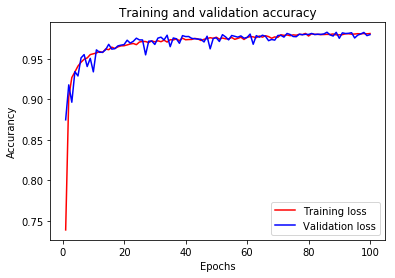

In [103]:
plt.plot(epochs_2_1, acc_2_1, 'r', label='Training loss')
plt.plot(epochs_2_1, val_acc_2_1, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accurancy')
plt.legend()
plt.show()

Accuracy is close to a 100% for traning and validatioin data.
___

In [81]:
y_pred_2_1 = model_2_1.predict(x_test_data.reshape(10000, 28*28))
y_pred_test_2_1 = np.argmax(y_pred_2_1, axis=1)

In [82]:
print(confusion_matrix(y_test_labels, y_pred_test_2_1))
print(classification_report(y_test_labels, y_pred_test_2_1))

[[ 959    0    0    0    2    4    5    1    4    5]
 [   0 1121    3    1    0    1    1    1    7    0]
 [   4    1  981   17    5    1    1    5   17    0]
 [   1    0    2  991    0    2    0    3    9    2]
 [   0    1    4    0  953    0    3    1    1   19]
 [   2    0    0   31    4  825    8    1   10   11]
 [   1    1    1    1    7    4  937    0    6    0]
 [   1    4    9    5    1    0    0  998    1    9]
 [   0    2    1    4    5    0    2    3  952    5]
 [   1    2    0    8   10    1    1    6    5  975]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.92      0.95       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97   

Only a few numbers were confused. 5 was confused by 3 and and 4 was confused with 9.
___

### 4. Conclusion

#### Model one hidden layer with 100 nodes
This model performed well with smaller batch size, but several time it has not classified one of the digit, but increasing the batch helped it to learn everytime which doesn't make sense based on what I read, but it worked1.
#### Model one hidden layer with 400 nodes
Perfomance of this model wasn't grate at all. It didn't categorize complete set and only smaller batch size increased accurancy significantly.
#### Model two hidden layers with 200 and 200 nodes
200 to 200 layers performed worse than one layer 400 nodes. Probably, because it doesn't narrow down combinations and might connect nodes directy to second layer.
#### Model two hidden layers with 200 and 100 nodes
This model accuracy is overall 97% as well as the first one layer with 100 nodes model. It converges more smoothly than the first model and faster. Probably it happens because it has two layers that allows the model to learn faster.

Batch size does change accuracy for the model but it doesn't help out if model itself is not good enough it might require too small batch size and too many epochs that it not reasonable for such a small problem. Model performs better on this data set with smaller hidden layers and when layers have different amounf of nodes.

### 4.1 Questions

#### 1. Which model gives the best accuracy?  Which the best overall F1 score?
The first with 100 nodes and last with 200 to 100 nodes gives the best accuracy. This is the same for F1 score.

#### 2. Which model gives the worst accuracy?  Which the worst overall F1 score?
The worst accuracy is 78% performed by two hidden layer models with the same amount of nodes for each hidden layer. Also, this model has the worst overall F1 score.

#### 3. What is the shape of the training set?  How many nodes are in the input layer of the network?
Shape is (60000, 28, 28). Input shape is 28px*28px = 784 nodes.

#### 4. Why do you think the best/worst networks are that way?
I think, it all depends on the size of the data and the training proccess based on loss function. Hidden layers affect the model, probably, size have to be less than input size and the same size of the hidden layers doesn't improve the model at all. 
#### 5. Experiment and try to create a better performing network.  Explain what you tried and document the results.
All models were trained over 100 epochs.

a. I've tried different number of layers, from 1 to 5. I used first 3 layer network with 400, 300, 200, layers. It performed horrible. 

b. I also tried with 2 layers 50, 30 and smaller batch size = 256, that wasn't great as well. 

c. The one with 3 layers 50,30,25 and batch size of 512 performed as good as the best one from the assignment and gave 97% accuracy. 

d. 3 layers 50,30,20 and batch size of 64 gave also 97% accuracy.

e. 3 layers 20,15,10 and batch size of 64 gave less accurate results 91% it started falling down after 50 epochs.

f. 4 layers 60,40,30,20 and batch size 512 gave 97% accuracy.

g. 4 layers 60,40,30,20 and batch size 256 gave 97% accuracy, only 21 was missclasified as 9.

h. 5 layers 80,60,40,25,15,10 and batch size 1024 performed at 97% accuracy

i. 5 layers 80,60,40,25,15,10 and batch size 512 performed at 97% accuracy

j. 1 layer with 10 nodes and batch size 512 performed at 91% accuracy

k. 2 layer with 20,40 and batch size 512 performed at 96%

Overall models could perform on train and train-validation data almost at 100%(99.7%), but on the test data it falls to 97% at max the way I adjusted it

In [185]:
model_5 = models.Sequential()
model_5.add(layers.Dense(20, activation='relu', input_shape=(28*28,)))
model_5.add(layers.Dense(40, activation='relu'))
model_5.add(layers.Dense(10, activation='softmax'))

In [186]:
model_5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [187]:
history_5 = model_5.fit(x_train_data, 
                        y_train_labels, 
                        epochs = epoch, 
                        batch_size = 512, 
                        validation_data = (x_train_val, y_train_val))

Train on 60000 samples, validate on 12000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 5.1987 - acc: 0.6322 - val_loss: 2.2574 - val_acc: 0.8150
Epoch 2/100
60000/60000 [==============================] - 1s 10us/step - loss: 1.4663 - acc: 0.8743 - val_loss: 1.2252 - val_acc: 0.8886
Epoch 3/100
60000/60000 [==============================] - 1s 10us/step - loss: 1.0647 - acc: 0.9055 - val_loss: 0.9240 - val_acc: 0.9192
Epoch 4/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.9283 - acc: 0.9177 - val_loss: 1.6766 - val_acc: 0.8468
Epoch 5/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.7962 - acc: 0.9266 - val_loss: 0.8881 - val_acc: 0.9147
Epoch 6/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.7127 - acc: 0.9334 - val_loss: 1.6527 - val_acc: 0.8592
Epoch 7/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.6713 - acc: 0.9374 - val_loss: 0.7657 - va

60000/60000 [==============================] - 1s 10us/step - loss: 0.1553 - acc: 0.9783 - val_loss: 0.3209 - val_acc: 0.9527
Epoch 60/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1537 - acc: 0.9781 - val_loss: 0.1693 - val_acc: 0.9766
Epoch 61/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.1496 - acc: 0.9783 - val_loss: 0.2365 - val_acc: 0.9691
Epoch 62/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1491 - acc: 0.9785 - val_loss: 0.2715 - val_acc: 0.9637
Epoch 63/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.1463 - acc: 0.9787 - val_loss: 0.1499 - val_acc: 0.9773
Epoch 64/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1441 - acc: 0.9789 - val_loss: 0.2015 - val_acc: 0.9728
Epoch 65/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1460 - acc: 0.9796 - val_loss: 0.1565 - val_acc: 0.9780
Epoch 66/100
60000/60000 [================

In [188]:
history_dict_5 = history_5.history
loss_5 = history_dict_5['loss']
val_loss_5 = history_dict_5['val_loss']
acc_5 = history_dict_5['acc']
val_acc_5 = history_dict_5['val_acc']

epochs_5 = range(1, len(acc_2_1)+1)

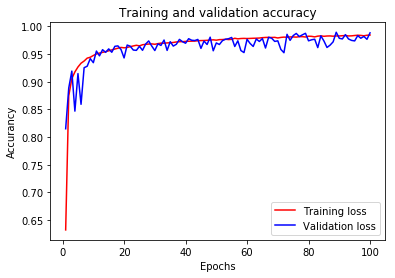

In [189]:
plt.plot(epochs_5, acc_5, 'r', label='Training loss')
plt.plot(epochs_5, val_acc_5, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accurancy')
plt.legend()
plt.show()

In [190]:
y_pred_5 = model_5.predict(x_test_data.reshape(10000, 28*28))
y_pred_test_5 = np.argmax(y_pred_5, axis=1)

In [191]:
print(confusion_matrix(y_test_labels, y_pred_test_5))
print(classification_report(y_test_labels, y_pred_test_5))

[[ 958    0    1    1    1    2    7    1    6    3]
 [   0 1116    4    2    1    1    2    0    9    0]
 [   2    1  991   10    7    2    8    1    8    2]
 [   0    1   13  962    0   11    0    5   12    6]
 [   2    1    7    0  934    0    3    3    5   27]
 [   3    0    1   20    0  845    5    0    7   11]
 [   7    3    5    1    4   15  917    0    6    0]
 [   0    5   16   13    3    5    1  965    7   13]
 [   2    0    4   10    3   10    8    4  928    5]
 [   3    3    0    8    9    5    0    7    6  968]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.94      0.95      0.94      1010
           4       0.97      0.95      0.96       982
           5       0.94      0.95      0.95       892
           6       0.96      0.96      0.96       958
           7       0.98      0.94   